In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns

In [15]:
df = pd.read_csv("vacancies.csv")
df["experience"] = df["experience"].replace("5plus", "5+")
valid_salaries = ["1-3", "3-5", "5+"]
df["experience"].isin(valid_salaries)

0      True
1      True
2      True
3      True
4      True
       ... 
139    True
140    True
141    True
142    True
143    True
Name: experience, Length: 144, dtype: bool

In [16]:
print(df.info())
print(df.describe())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company       144 non-null    object
 1   description   144 non-null    object
 2   experience    144 non-null    object
 3   location      143 non-null    object
 4   salary        22 non-null     object
 5   technologies  144 non-null    object
 6   title         144 non-null    object
dtypes: object(7)
memory usage: 8.0+ KB
None
             company                                        description  \
count            144                                                144   
unique           119                                                144   
top     Nova Digital  <div class="b-typo vacancy-section">\n\t\t\t\t...   
freq               4                                                  1   

       experience   location     salary technologies                    title  
count         144

In [17]:
top_companies = df["company"].value_counts()
top_companies

company
Nova Digital             4
Intellias                4
Binariks                 3
Ciklum                   3
Preply                   3
                        ..
KITRUM                   1
Luxe Quality             1
Windsor.ai               1
SoftConstruct Ukraine    1
Erbis                    1
Name: count, Length: 119, dtype: int64

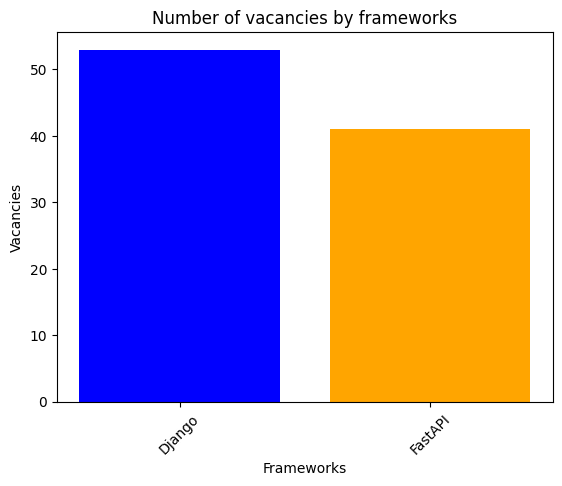

In [52]:
django_jobs = df[df["technologies"].str.contains("django", na=False)]
fast_api_jobs = df[
    df["technologies"].str.contains("fast api", na=False) |
    df["technologies"].str.contains("fastapi", na=False)
]
job_counts = {
    "Django": len(django_jobs),
    "FastAPI": len(fast_api_jobs)
}


plt.bar(job_counts.keys(), job_counts.values(), color=["blue", "orange"])
plt.title("Number of vacancies by frameworks")
plt.xlabel("Frameworks")
plt.ylabel("Vacancies")
plt.xticks(rotation=45)
plt.savefig("plots/Number of vacancies by frameworks.png", bbox_inches="tight")
plt.show()

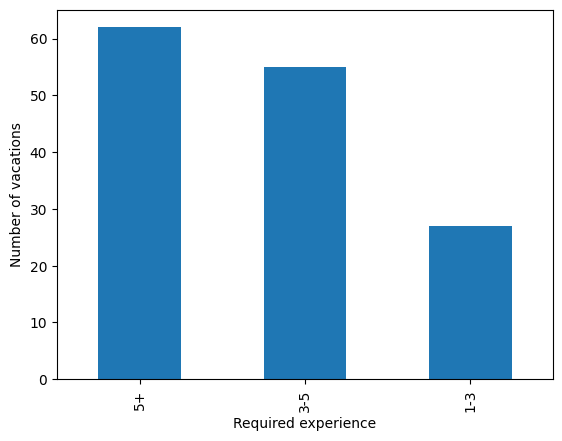

In [50]:
df["experience"].value_counts().plot(kind="bar")
plt.xlabel("Required experience")
plt.ylabel("Number of vacations")
plt.savefig("plots/required experience.png", bbox_inches="tight")
plt.show()

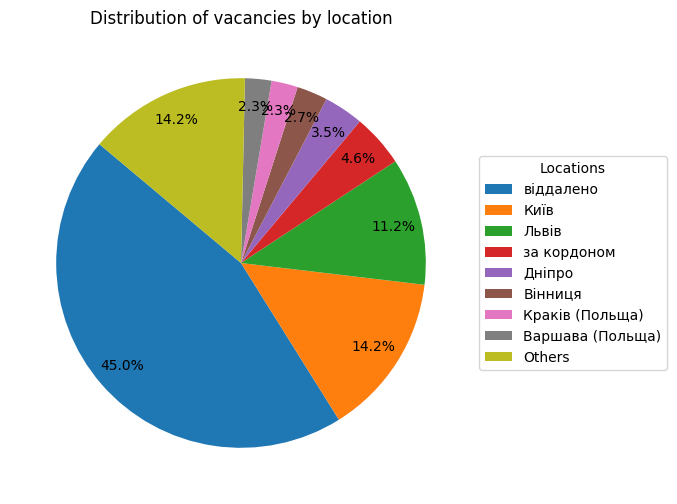

In [54]:
locations_expanded = df["location"].str.split(',').explode()
location_counts = locations_expanded.value_counts()
threshold = 0.02 * location_counts.sum()

main_locations = location_counts[location_counts >= threshold]
other_locations = location_counts[location_counts < threshold].sum()

main_locations["Others"] = other_locations

fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(
    main_locations, labels=None, autopct='%1.1f%%', startangle=140, pctdistance=0.85
)

ax.legend(main_locations.index, title="Locations", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Distribution of vacancies by location")
plt.savefig("plots/distribution of vacancies by location.png", bbox_inches="tight")
plt.show()

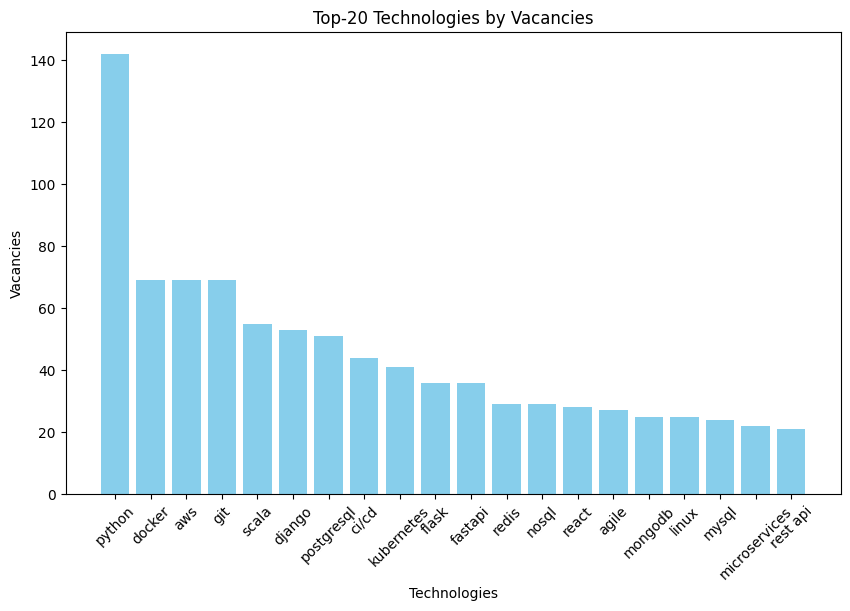

In [48]:
technology_counts = df["technologies"].str.get_dummies(sep=",").sum().sort_values(ascending=False)

top_20_technologies = technology_counts.head(20)


plt.figure(figsize=(10, 6))
plt.bar(top_20_technologies.index, top_20_technologies.values, color="skyblue")
plt.title("Top-20 Technologies by Vacancies")
plt.xlabel("Technologies")
plt.ylabel("Vacancies")
plt.xticks(rotation=45)
plt.savefig("plots/top_20_technologies.png", bbox_inches="tight")
plt.show()